# Stock market API Project
Rapid API URL - [https://rapidapi.com/alphavantage/api/alpha-vantage](https://rapidapi.com/alphavantage/api/alpha-vantage)

In [8]:
%pip install python-dotenv plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
import os 
api_key = os.getenv("API_KEY")

In [7]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {
    "datatype": "json",
    "keywords": "State Bank of India",
    "function": "SYMBOL_SEARCH",
}

headers = {
    "x-rapidapi-key": api_key, 
    "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

response.json()["bestMatches"]

[{'1. symbol': 'SBIN.BSE',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBKFF',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'United States',
  '5. marketOpen': '09:30',
  '6. marketClose': '16:00',
  '7. timezone': 'UTC-04',
  '8. currency': 'USD',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SID.FRK',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'Frankfurt',
  '5. marketOpen': '08:00',
  '6. marketClose': '20:00',
  '7. timezone': 'UTC+02',
  '8. currency': 'EUR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBID.LON',
  '2. name': 'State Bank of India GDR',
  '3. type': 'Equity',
  '4. region': 'United Kingdom',
  '5. marketOpen': '08:00',
  '6. marketClose': '16:30',
  '7. timezone': 'UTC+01',
  '8. currency': 'USD',
  '9. mat

### Create a class StockFetch

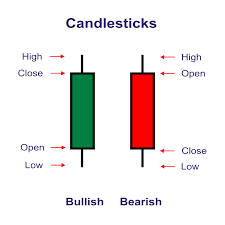

In [9]:
import pandas as pd
import plotly.graph_objects as go

In [26]:
class StockFetch:

    def __init__(self, api_key) -> None:
        self.api_key = api_key
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": self.api_key, 
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
        }

    def symbol_search(self, company):
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()["bestMatches"]
        df = pd.DataFrame(data)
        return df
    
    def daily_data(self, symbol):
        querystring = {
            "function":"TIME_SERIES_DAILY",
            "symbol":symbol,
            "outputsize":"compact",
            "datatype":"json"
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        df = pd.DataFrame(response.json()["Time Series (Daily)"]).T
        df.index = pd.to_datetime(df.index)
        for i in df.columns:
            df[i] = df[i].astype(float)

        return df 
    
    def plot_chart(self, symbol):
        df = self.daily_data(symbol)
        fig = go.Figure(data=[
            go.Candlestick(
                x = df.index,
                open = df["1. open"],
                high = df["2. high"],
                low = df["3. low"],
                close = df["4. close"]
            )
        ])
        fig.update_layout(width=1000, height=800)
        fig.show()

In [20]:
client = StockFetch(api_key = os.getenv("API_KEY"))

In [21]:
df1 = client.symbol_search(company="HDFC Bank")
df1

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,HDB,HDFC Bank Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.8182
1,HDFCBANK.BSE,HDFC Bank Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.8000
2,H1DB34.SAO,HDFC Bank Limited,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6923
3,HDFA.FRK,HDFC Bank Limited,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6923


In [22]:
df1.to_csv("Symbol.csv", index=False)

In [23]:
df2 = client.daily_data(symbol="HDFCBANK.BSE")
df2

,1. open,2. high,3. low,4. close,5. volume
2024-10-04,1668.95,1690.40,1652.40,1656.80,1035087.0
2024-10-03,1710.05,1725.90,1673.80,1682.15,4622696.0
2024-10-01,1724.10,1742.00,1720.05,1726.15,115295.0
2024-09-30,1751.00,1752.00,1724.00,1732.00,725769.0
2024-09-27,1778.10,1778.10,1750.00,1752.85,232369.0
...,...,...,...,...,...
2024-05-18,1464.25,1468.95,1463.40,1465.40,68410.0
2024-05-17,1455.00,1468.00,1449.00,1464.90,692540.0
2024-05-16,1442.55,1462.00,1436.00,1460.15,458835.0
2024-05-15,1459.60,1459.60,1436.00,1438.85,531031.0


In [24]:
df2.to_csv("HDFCBank.csv")

In [27]:
client.plot_chart(symbol="HDFCBANK.BSE")

In [28]:
df3 = client.symbol_search(company="Godrej")
df3

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,GODREJCP.BSE,GODREJ CONSUMER PRODUCTS LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.7059
1,GODREJIND.BSE,GODREJ INDUSTRIES LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6667
2,GODREJAGRO.BSE,Godrej Agrovet Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6316
3,GODREJPROP.BSE,Godrej Properties Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6316
4,540743.BSE,Godrej Agrovet Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4286
5,532424.BSE,Godrej Consumer Products Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.3158


In [30]:
df4 = client.daily_data(symbol="GODREJIND.BSE")
df4

,1. open,2. high,3. low,4. close,5. volume
2024-10-04,1123.90,1128.40,1080.00,1112.50,17900.0
2024-10-03,1191.50,1191.50,1112.50,1116.70,15807.0
2024-10-01,1234.00,1245.00,1180.05,1191.15,17529.0
2024-09-30,1233.90,1243.15,1225.05,1236.80,7022.0
2024-09-27,1253.80,1253.80,1216.80,1233.90,4711.0
...,...,...,...,...,...
2024-05-18,792.00,794.20,781.75,794.20,2971.0
2024-05-17,800.00,801.75,792.90,795.10,8820.0
2024-05-16,800.80,804.75,793.70,798.65,10236.0
2024-05-15,818.65,818.65,796.50,800.70,11770.0


In [31]:
df4.to_csv("GodrejInd.csv")

In [32]:
client.plot_chart(symbol="GODREJIND.BSE")